# Activity 2 Part 2

## Rotation properties

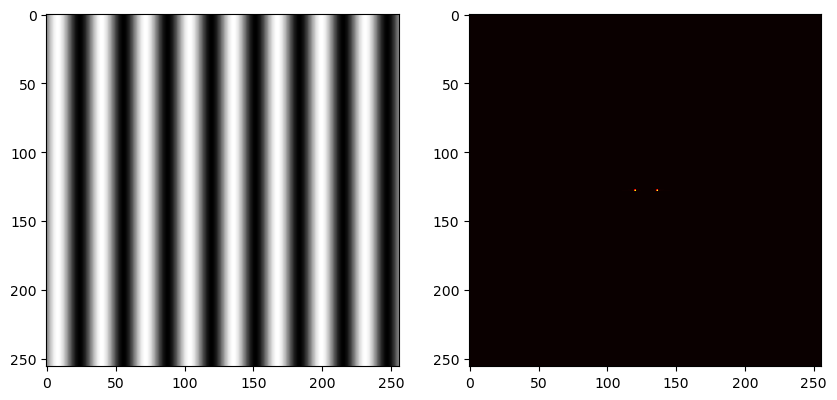

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi
from numpy.fft import fft2, ifft2, fftshift

def sinusoid(N, f, theta=0):  # generate sinusoid, N - no. of pixels, f - frequency, theta - angle of rotation
    x = np.linspace(-1,1,N)
    y = np.linspace(-1,1,N)                # sin(2f*pi x) f determines frequency per unit
    X,Y = np.meshgrid(x,y)
    sinusoid = sin(2*pi*f*(Y*sin(theta) + X*cos(theta)))
    return sinusoid

N = 256
f=4

z = sinusoid(N,f)
z_fft = fftshift(fft2(z))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(z, cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(abs(z_fft), cmap='hot')

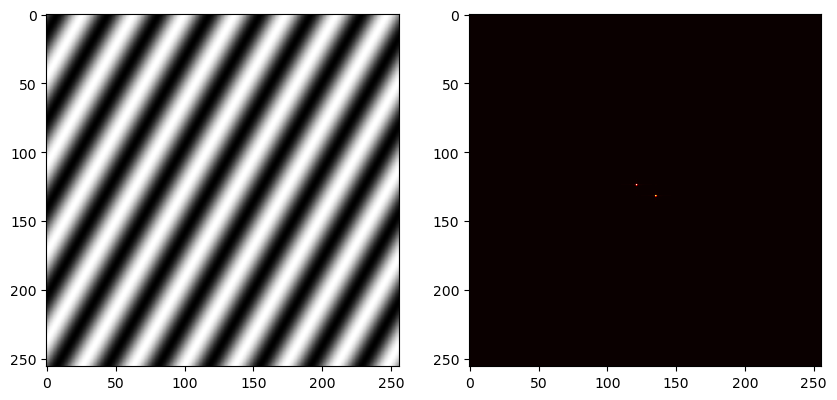

In [80]:
z_rot = sinusoid(N, f, pi/6)
z_rot_fft = fftshift(fft2(z_rot))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(z_rot, cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(abs(z_rot_fft), cmap='hot')

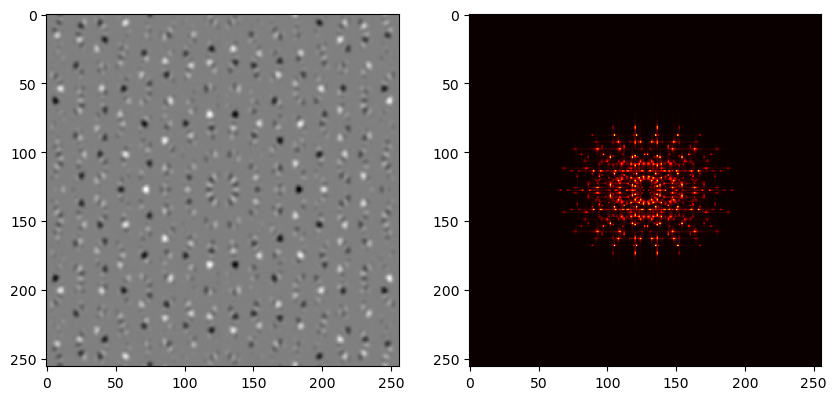

In [81]:
from numpy import linspace

thetas = linspace(0,2*pi, 10)

z = sinusoid(N,f)
for t in thetas:
    z *= sinusoid(N,f,theta=t)

# z = sinusoid(N, f, theta=0)*sinusoid(N,f,theta=pi)*sinusoid(N,f,theta=2*pi)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(z, cmap='gray')

z_rot_fft = fftshift(fft2(z))
ax = fig.add_subplot(122)
plt.imshow(abs(z_rot_fft), cmap='hot')

## Painting by Dr. Daria

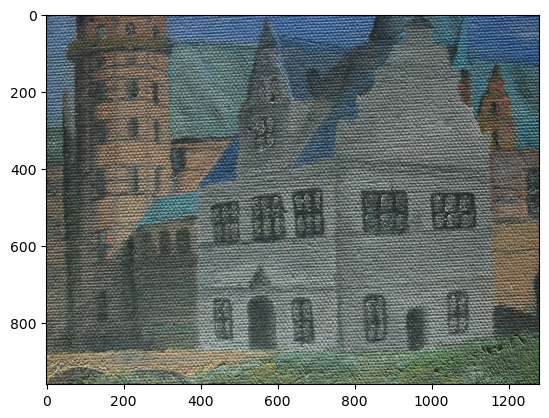

In [83]:
daria = plt.imread('painting.JPG')

plt.imshow(daria)

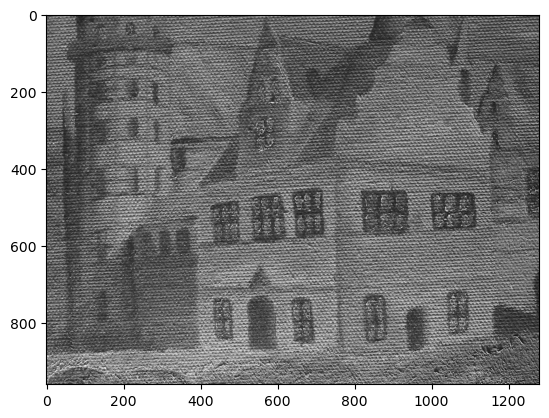

In [195]:
def mean_gray(img):
    grayscale = np.dot(img[...,:3],[0.2989, 0.5870, 0.1140])
    return grayscale

daria_gray = mean_gray(daria)

# daria_gray = daria_gray[:960,:960] # crop image

plt.imshow(daria_gray, cmap='gray')

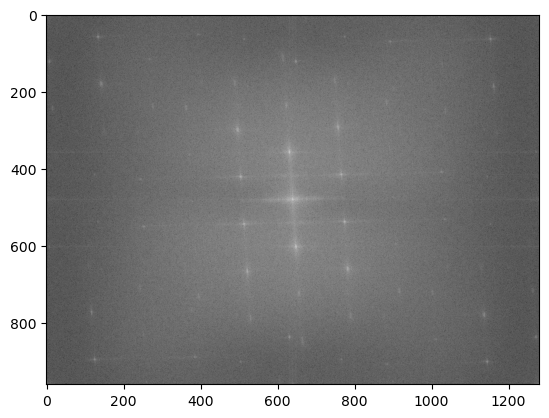

In [197]:
daria_ft = fftshift(fft2(daria_gray))

# plt.axvline(x= 130)
# plt.axhline(y = 65)

plt.imshow(np.log(abs(daria_ft)), cmap='gray')
# plt.imsave('painting_fft.png',np.log(abs(daria_ft)), cmap='gray')

In [86]:
# i tried automating the mask

# def crop(img, x_start, x_stop, y_start, y_stop):
#     img = img[y_start:y_stop, x_start:x_stop]
#     return img

# def maxAtCrop(img):
#     max_local = abs(img).max()
#     x,y = np.where(abs(img) == max_local)
#     return x,y

# daria_crop = crop(daria_ft,400,500,400,500)

# plt.imshow(np.log(abs(daria_crop)), cmap='gray')
# maxAtCrop(daria_crop)

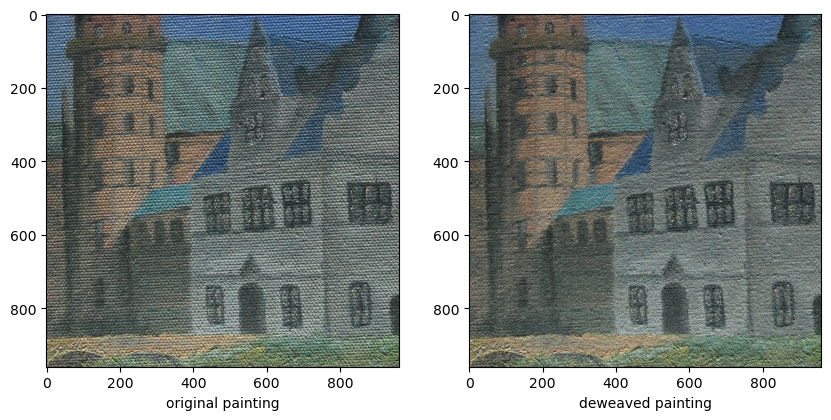

In [94]:
mask = plt.imread('painting_mask.png')
thresh = 127
cond = mask > thresh
mask_bin = cond*1

mask_ft = fftshift(mask_bin)

daria_red = daria[:,:,0]
daria_red = daria_red[:960,:960]
daria_red_ft = fft2(daria_red)

daria_green = daria[:,:,1]
daria_green = daria_green[:960,:960]
daria_green_ft = fft2(daria_green)

daria_blue = daria[:,:,2]
daria_blue = daria_blue[:960,:960]
daria_blue_ft = fft2(daria_blue)

convolv_red = daria_red_ft*mask_ft[:,:,0]
convolv_green = daria_green_ft*mask_ft[:,:,1]
convolv_blue = daria_blue_ft*mask_ft[:,:,2]

magandang_painting_red = ifft2(convolv_red)
magandang_painting_green = ifft2(convolv_green)
magandang_painting_blue = ifft2(convolv_blue)

magandang_painting = np.dstack((magandang_painting_red,magandang_painting_green,magandang_painting_blue))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.set_xlabel('original painting')
plt.imshow(daria[:960,:960])
ax = fig.add_subplot(122)
ax.set_xlabel('deweaved painting')
plt.imshow(abs(magandang_painting).astype('uint8'))
# plt.imsave('deweaved-painting.png', abs(magandang_painting).astype('uint8'))
# plt.imsave('painting.png', daria[:960,:960])

## Lunar landing

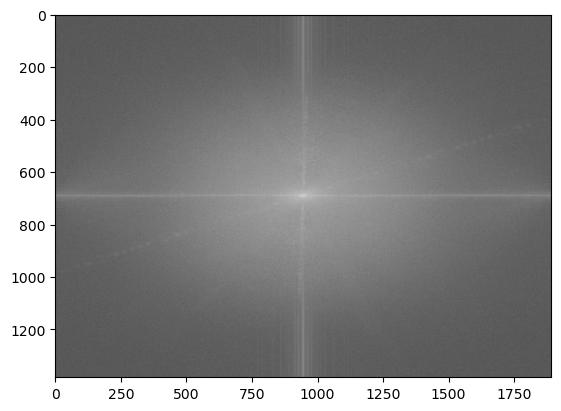

In [97]:
lunar = plt.imread('ApolloLand05.tif')

lunar_ft = fft2(lunar)
lunar_fftshift = fftshift(lunar_ft)

plt.imshow(np.log(abs(lunar_fftshift)), cmap='gray')

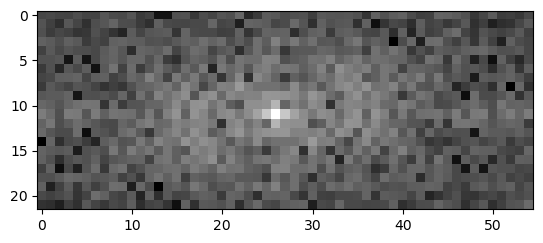

In [173]:
plt.imshow(np.log(abs(lunar_fftshift[680:702,920:975])),cmap='gray')

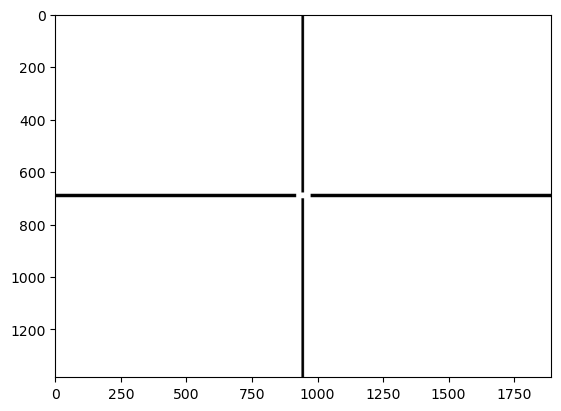

In [193]:
num_mask = np.ones([1383,1892])
num_mask[685:698,:] = 0
# num_mask[:,920:975] = 1
num_mask[:,940:950] = 0
# num_mask[680:702,:] = 1
num_mask[680:702,920:975] = 1

plt.imshow(num_mask, cmap = 'gray')
# plt.imsave('lunar_mask.png',num_mask, cmap = 'gray')

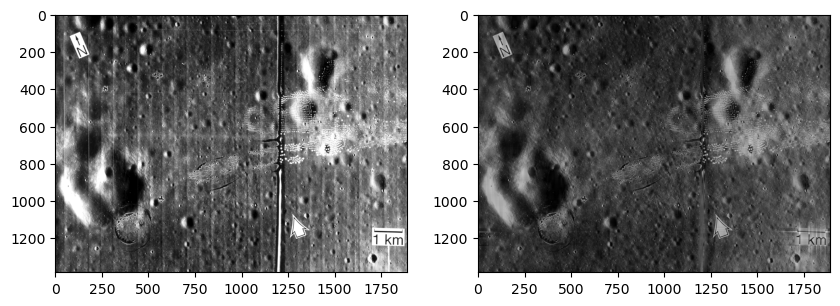

In [194]:
# lunar_mask = plt.imread('lunarmask.png')
# thresh = 127
# cond = lunar_mask > thresh
# lunar_mask_bin = cond*1

lunar_mask_ft = fftshift(num_mask)

lunar_convolv = lunar_ft*lunar_mask_ft

magandang_lunar = ifft2(lunar_convolv)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
plt.imshow(lunar, cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(abs(magandang_lunar),cmap='gray')
# plt.imsave('stitched lunar.png',abs(magandang_lunar),cmap='gray')